In [121]:
import pandas as pd

df=pd.read_csv('/content/cleaned_globestay.csv')

# List of columns to keep
keep_cols = [
    'clicks_email', 'clicks_ppc_brand', 'clicks_ppc_non_brand', 'clicks_remarketing',
    'clicks_shop_googleha', 'clicks_shop_other', 'clicks_shop_tripadvisor', 'clicks_shop_trivago',
    'sales_emk', 'sales_ppc_brand', 'sales_ppc_nonbrand', 'sales_retargeting',
    'sales_shop_googleha', 'sales_shop_other', 'sales_shop_tripadvisor', 'sales_shop_trivago',
    'sales_direct','sales_interco', 'sales_strat_part',
    'totbookings', 'country'
]

# Subset the dataframe
df_subset = df[keep_cols].copy()

print("Columns kept:", df_subset.columns.tolist())
df_subset.head()

Columns kept: ['clicks_email', 'clicks_ppc_brand', 'clicks_ppc_non_brand', 'clicks_remarketing', 'clicks_shop_googleha', 'clicks_shop_other', 'clicks_shop_tripadvisor', 'clicks_shop_trivago', 'sales_emk', 'sales_ppc_brand', 'sales_ppc_nonbrand', 'sales_retargeting', 'sales_shop_googleha', 'sales_shop_other', 'sales_shop_tripadvisor', 'sales_shop_trivago', 'sales_direct', 'sales_interco', 'sales_strat_part', 'totbookings', 'country']


,clicks_email,clicks_ppc_brand,clicks_ppc_non_brand,clicks_remarketing,clicks_shop_googleha,clicks_shop_other,clicks_shop_tripadvisor,clicks_shop_trivago,sales_emk,sales_ppc_brand,...,sales_retargeting,sales_shop_googleha,sales_shop_other,sales_shop_tripadvisor,sales_shop_trivago,sales_direct,sales_interco,sales_strat_part,totbookings,country
0,474859.0,378640.216496,2.496438e+06,172069.878486,133462.122833,250527.000002,367987.978037,8.478270e+05,16703.0,48228.0,...,2040.0,10423.0,4678.0,9503.0,18302.0,183169.0,867.0,16547.0,398268.0,de
1,478024.0,386722.377913,2.520208e+06,198123.396746,136016.480131,278878.649717,353354.844840,9.612325e+05,16278.0,49076.0,...,2236.0,11107.0,5019.0,9143.0,21148.0,184480.0,858.0,17340.0,404068.0,de
2,482391.0,372694.075197,2.538803e+06,186402.476444,126167.255474,288057.500725,332119.415416,9.127736e+05,15822.0,45575.0,...,2224.0,10048.0,4963.0,8568.0,19715.0,178895.0,806.0,16873.0,388746.0,de
3,477310.0,367930.614827,2.520338e+06,203471.161091,127212.718534,281681.767054,299462.651303,1.063155e+06,15441.0,46037.0,...,2498.0,10234.0,5266.0,8065.0,22804.0,178961.0,770.0,17386.0,391945.0,de
4,475233.0,352899.330762,2.354455e+06,205548.009831,130732.603895,259377.433805,281375.925071,1.059135e+06,15610.0,45020.0,...,2481.0,10490.0,5186.0,7610.0,23259.0,178238.0,807.0,17840.0,389989.0,de


In [122]:
# Step 1: Identify clicks and sales columns
click_cols = [
    'clicks_email', 'clicks_ppc_brand', 'clicks_ppc_non_brand', 'clicks_remarketing',
    'clicks_shop_googleha', 'clicks_shop_other', 'clicks_shop_tripadvisor', 'clicks_shop_trivago'
]

sales_channel_cols = [
    'sales_emk', 'sales_ppc_brand', 'sales_ppc_nonbrand', 'sales_retargeting',
    'sales_shop_googleha', 'sales_shop_other', 'sales_shop_tripadvisor', 'sales_shop_trivago'
]

sales_non_channel_cols = ['sales_direct', 'sales_interco', 'sales_strat_part']

# Step 2: Calculate total clicks and % of total
clicks_total = df_subset[click_cols].sum().sum()
df_subset[click_cols] = df_subset[click_cols].sum() / clicks_total # % of total

# Step 4: Round for readability
df_subset = df_subset.round(2)

df_subset.head()


/tmp/ipython-input-4078142454.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,clicks_email,clicks_ppc_brand,clicks_ppc_non_brand,clicks_remarketing,clicks_shop_googleha,clicks_shop_other,clicks_shop_tripadvisor,clicks_shop_trivago,sales_emk,sales_ppc_brand,...,sales_retargeting,sales_shop_googleha,sales_shop_other,sales_shop_tripadvisor,sales_shop_trivago,sales_direct,sales_interco,sales_strat_part,totbookings,country
0,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,16703.0,48228.0,...,2040.0,10423.0,4678.0,9503.0,18302.0,183169.0,867.0,16547.0,398268.0,de
1,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,16278.0,49076.0,...,2236.0,11107.0,5019.0,9143.0,21148.0,184480.0,858.0,17340.0,404068.0,de
2,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,15822.0,45575.0,...,2224.0,10048.0,4963.0,8568.0,19715.0,178895.0,806.0,16873.0,388746.0,de
3,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,15441.0,46037.0,...,2498.0,10234.0,5266.0,8065.0,22804.0,178961.0,770.0,17386.0,391945.0,de
4,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,15610.0,45020.0,...,2481.0,10490.0,5186.0,7610.0,23259.0,178238.0,807.0,17840.0,389989.0,de


In [123]:
# Step 1: Sum channel sales per row
df_subset["sales_channel_total"] = df_subset[sales_channel_cols].sum(axis=1)

# Step 2: Sum non-channel sales per row
df_subset["sales_non_channel_total"] = df_subset[sales_non_channel_cols].sum(axis=1)

# Step 3: Optional - calculate % of total sales (across all rows)
total_channel_sales = df_subset["sales_channel_total"].sum()
total_non_channel_sales = df_subset["sales_non_channel_total"].sum()

df_subset["sales_channel_pct"] = df_subset["sales_channel_total"] / (df_subset["sales_channel_total"]+df_subset["sales_non_channel_total"])
df_subset["sales_non_channel_pct"] = df_subset["sales_non_channel_total"] / (df_subset["sales_channel_total"]+df_subset["sales_non_channel_total"])

# Round for readability
df_subset = df_subset.round(2)

# Drop other sales columns
df_subset = df_subset.drop(columns=sales_channel_cols + sales_non_channel_cols)

df_subset.head()

,clicks_email,clicks_ppc_brand,clicks_ppc_non_brand,clicks_remarketing,clicks_shop_googleha,clicks_shop_other,clicks_shop_tripadvisor,clicks_shop_trivago,totbookings,country,sales_channel_total,sales_non_channel_total,sales_channel_pct,sales_non_channel_pct
0,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,398268.0,de,197685.0,200583.0,0.50,0.50
1,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,404068.0,de,201390.0,202678.0,0.50,0.50
2,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,388746.0,de,192172.0,196574.0,0.49,0.51
3,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,391945.0,de,194828.0,197117.0,0.50,0.50
4,0.08,0.06,0.45,0.06,0.06,0.08,0.08,0.13,389989.0,de,193104.0,196885.0,0.50,0.50


In [124]:
# Create new estimated booking columns
for col in click_cols:
    df_subset["est_booking_" + col] = df_subset[col] * df_subset["totbookings"] * df_subset["sales_channel_pct"]

# Round for readability
df_subset = df_subset.round(0)

# View the new columns
cols_to_show =[col for col in df_subset.columns if "booking" in col]

df_subset[cols_to_show].head()


,totbookings,est_booking_clicks_email,est_booking_clicks_ppc_brand,est_booking_clicks_ppc_non_brand,est_booking_clicks_remarketing,est_booking_clicks_shop_googleha,est_booking_clicks_shop_other,est_booking_clicks_shop_tripadvisor,est_booking_clicks_shop_trivago
0,398268.0,15931.0,11948.0,89610.0,11948.0,11948.0,15931.0,15931.0,25887.0
1,404068.0,16163.0,12122.0,90915.0,12122.0,12122.0,16163.0,16163.0,26264.0
2,388746.0,15239.0,11429.0,85718.0,11429.0,11429.0,15239.0,15239.0,24763.0
3,391945.0,15678.0,11758.0,88188.0,11758.0,11758.0,15678.0,15678.0,25476.0
4,389989.0,15600.0,11700.0,87748.0,11700.0,11700.0,15600.0,15600.0,25349.0


In [125]:
# List of cost columns
cost_cols = [
    'cost_email', 'cost_ppc_brand', 'cost_ppc_non_brand', 'cost_remarketing',
    'cost_shop_googleha', 'cost_shop_other', 'cost_shop_tripadvisor', 'cost_shop_trivago'
]

# Subset dataframe to only cost columns
df_cost_only = df[cost_cols].copy()

df_cost_only.head()

,cost_email,cost_ppc_brand,cost_ppc_non_brand,cost_remarketing,cost_shop_googleha,cost_shop_other,cost_shop_tripadvisor,cost_shop_trivago
0,0.0,68560.240287,2.196494e+06,58684.506092,170087.676546,103139.320644,283108.460235,377911.565361
1,0.0,70502.248076,2.306422e+06,76380.207088,193176.386595,116137.878276,257639.565836,471254.197728
2,0.0,61647.322276,2.379034e+06,81636.483459,191568.477802,116345.872180,247711.892237,439863.176592
3,0.0,58113.630201,2.342182e+06,97974.916607,210296.033518,117989.868406,220940.048133,499118.517506
4,0.0,56688.931152,2.242276e+06,95282.006389,214412.055927,123253.978573,204314.700744,487391.446449


In [126]:
# 1. Prepare channel mapping
click_cols = [col for col in df_subset.columns if "est_booking_" in col]
cost_cols = [col for col in df_cost_only.columns if "cost_" in col]

# 2. Melt estimated bookings
df_est_long = df_subset[click_cols].melt(var_name="channel", value_name="est_booking")
df_est_long["channel"] = df_est_long["channel"].str.replace("est_booking_", "", regex=False)

# 3. Melt cost table
df_cost_long = df_cost_only[cost_cols].melt(var_name="channel", value_name="cost")
df_cost_long["channel"] = df_cost_long["channel"].str.replace("cost_", "", regex=False)

# 4. Combine est_booking and cost (align by row first)
df_combined = pd.concat([df_est_long.reset_index(drop=True),
                         df_cost_long["cost"].reset_index(drop=True)], axis=1)

# 5. Aggregate by channel (sum across all rows)
summary_table = df_combined.groupby("channel")[["cost", "est_booking"]].sum().reset_index()

# Round for readability
summary_table = summary_table.round(2)

In [127]:
# Remove "clicks_" prefix from channel names
summary_table["channel"] = summary_table["channel"].str.replace("clicks_", "", regex=False)

# Calculate cost per booking and ROI
summary_table["cost_per_booking"] = summary_table.apply(
    lambda row: row["cost"] / row["est_booking"] if row["est_booking"] != 0 else 0, axis=1
)

summary_table["ROI"] = summary_table.apply(
    lambda row: row["est_booking"] / row["cost"] if row["cost"] != 0 else 0, axis=1
)

# Round for readability
summary_table = summary_table.round(2)

# Show top 10 rows
summary_table.head(10)


,channel,cost,est_booking,cost_per_booking,ROI
0,email,0.000000e+00,14734648.0,0.00,0.00
1,ppc_brand,4.183834e+07,11050989.0,3.79,0.26
2,ppc_non_brand,2.026874e+09,82882377.0,24.45,0.04
3,remarketing,7.135466e+07,11050989.0,6.46,0.15
4,shop_googleha,4.327277e+08,11050989.0,39.16,0.03
5,shop_other,1.767498e+08,14734648.0,12.00,0.08
6,shop_tripadvisor,3.794268e+08,14734648.0,25.75,0.04
7,shop_trivago,4.812252e+08,23943798.0,20.10,0.05


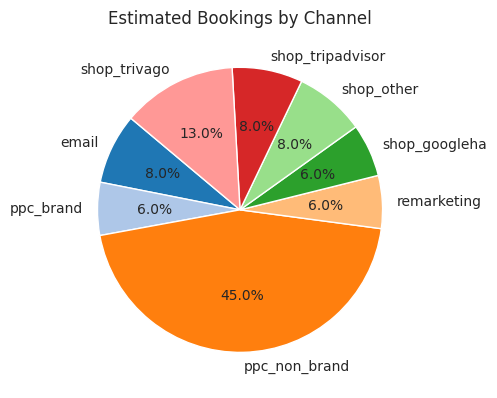

In [128]:
import matplotlib.pyplot as plt

# Make sure your channels are clean (without 'clicks_')
summary_table["channel"] = summary_table["channel"].str.replace("clicks_", "", regex=False)

# Pie chart for Estimated Bookings
plt.figure(figsize=(5, 5))
plt.pie(
    summary_table["est_booking"],
    labels=summary_table["channel"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Estimated Bookings by Channel")
plt.tight_layout()
plt.show()

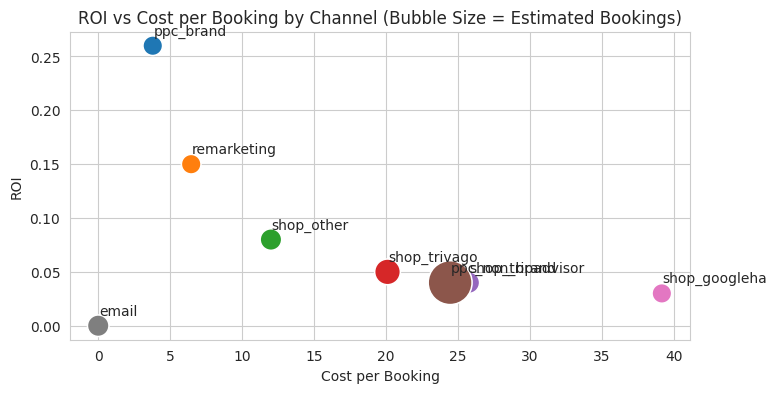

In [129]:
import seaborn as sns

# Sort table (optional)
summary_sorted = summary_table.sort_values("ROI", ascending=False)

plt.figure(figsize=(8,4))

# Scatter plot
sns.scatterplot(
    x="cost_per_booking",
    y="ROI",
    size="est_booking",       # bubble size
    hue="channel",
    data=summary_sorted,
    sizes=(200, 1000),
    legend=False,
    palette="tab10"
)

# Add data labels for each point
for i, row in summary_sorted.iterrows():
    plt.text(
        row["cost_per_booking"] + 0.05,  # small offset on x-axis
        row["ROI"] + 0.01,               # small offset on y-axis
        row["channel"],
        fontsize=10
    )

plt.xlabel("Cost per Booking")
plt.ylabel("ROI")
plt.title("ROI vs Cost per Booking by Channel (Bubble Size = Estimated Bookings)")
plt.show()

